In [44]:
import numpy as np

import sklearn

import seaborn as sns

import os

import random

import matplotlib.pyplot as plt

import matplotlib.image as mpimg

from tqdm import tqdm

import pandas as pd

from sklearn.utils import shuffle

import cv2

from PIL import Image 

from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RandomizedSearchCV

In [3]:
test_dir = r'C:\Users\ASUS\Desktop\cats vs dogs\test1'

train_dir = r'C:\Users\ASUS\Desktop\cats vs dogs\train'

train = os.listdir(train_dir)

test = os.listdir(test_dir)

In [4]:
label =[]

for i in train:
    name = i.split('.')[0]
    if name == "dog":
        label.append(0)
    else:
        label.append(1)
df = pd.DataFrame({'Image File': train , 'Label': label})

df = shuffle(df)

In [5]:
df.head()

,Image File,Label
6554,cat.4647.jpg,1
16987,dog.2787.jpg,0
16663,dog.2495.jpg,0
19102,dog.4690.jpg,0
7627,cat.5612.jpg,1


In [6]:
def plot(img):
    fig, axes = plt.subplots(3, 3,figsize=(15, 5))
    fig.subplots_adjust(hspace=0.4 , wspace=0.2)

    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(mpimg.imread(img[i]))
         
    plt.show()

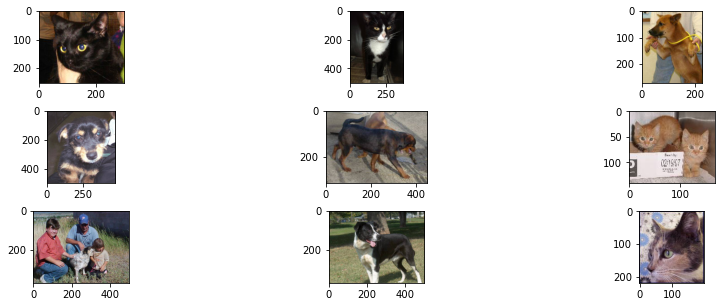

In [7]:
imgs = []

for i in range(10):
  # pick 4 random ids from the dataset
    rand_id = np.random.randint(0, len(train))
  
  # get the img path from the id
    file = df.loc[rand_id, 'Image File'] 
    path = os.path.join(train_dir, file)
    imgs.append(path)
  
plot(imgs)


let's take a look at our data: we have different sized colored images of cats and dogs. 

we would like them to be more uniform, and therefore, we will resize them (despite that it will distort some images) and make them grayscale

https://stackoverflow.com/questions/57931520/image-resizing-problem-with-python-using-cat-and-dog-data

In [28]:
def create_train():
    
    training_data = []
    
    for img in train:
        path = os.path.join(train_dir,img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (50,50))
        img.reshape(50,50)
        training_data.append([np.array(img)])
    
    shuffle(training_data)
    np.save('training_data2.npy', training_data)
    return training_data

In [8]:
url=r'C:\Users\ASUS\Desktop\cats vs dogs\train\\'

In [17]:
def create_train2():
    data = list()
    label = 1
    for img in tqdm(os.listdir(url)):
        if img.startswith('cat'): label = 1 
        else :label = 0 
        im = asarray(Image.open(url+img).resize((50,50)).convert('L'))
        data.append([im,label])
    np.save('training_data3.npy', data)
    return data

In [29]:
create_train()

[[array([[172, 180, 186, ..., 220, 213, 207],
         [172, 179, 187, ..., 221, 216, 210],
         [171, 179, 181, ..., 219, 217, 215],
         ...,
         [134, 137, 140, ...,   5,   5,   5],
         [129, 134, 136, ...,   3,   3,   3],
         [126, 131, 134, ...,   2,   2,   2]], dtype=uint8)],
 [array([[ 42,  58,  38, ...,  96,  93, 193],
         [ 43,  45,  44, ...,  82,  81, 203],
         [ 43,  43,  45, ...,  87,  88, 193],
         ...,
         [ 25,  20,  25, ...,  40,  68,  74],
         [ 20,  21,  22, ...,  77,  38,  93],
         [ 23,  22,  20, ...,  57,  62,  29]], dtype=uint8)],
 [array([[ 44,  47,  53, ..., 148, 149, 153],
         [ 58,  59,  69, ..., 152, 151, 157],
         [ 59,  64,  59, ..., 155, 155, 158],
         ...,
         [156, 150, 129, ..., 149, 168, 166],
         [160, 143, 139, ..., 145, 166, 169],
         [154, 143, 132, ..., 143, 163, 165]], dtype=uint8)],
 [array([[221, 224, 235, ..., 230, 245, 236],
         [224, 219, 231, ..., 242, 2

In [10]:
create_train2()

100%|██████████| 25000/25000 [04:09<00:00, 100.13it/s]
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


[[array([[171, 179, 186, ..., 220, 214, 207],
         [172, 179, 187, ..., 221, 216, 210],
         [171, 179, 183, ..., 219, 217, 215],
         ...,
         [134, 137, 140, ...,   5,   5,   4],
         [129, 133, 137, ...,   3,   3,   3],
         [126, 130, 134, ...,   2,   2,   2]], dtype=uint8),
  1],
 [array([[ 41,  48,  42, ...,  92, 103, 184],
         [ 39,  45,  46, ...,  91, 104, 186],
         [ 39,  43,  44, ...,  84, 107, 187],
         ...,
         [ 24,  24,  22, ...,  53,  71,  72],
         [ 20,  22,  21, ...,  58,  54,  64],
         [ 22,  22,  22, ...,  59,  58,  40]], dtype=uint8),
  1],
 [array([[ 42,  49,  55, ..., 146, 148, 153],
         [ 59,  62,  66, ..., 149, 150, 156],
         [ 62,  64,  61, ..., 151, 152, 159],
         ...,
         [160, 152, 136, ..., 149, 168, 167],
         [161, 151, 144, ..., 148, 166, 166],
         [152, 143, 134, ..., 143, 164, 164]], dtype=uint8),
  1],
 [array([[222, 224, 231, ..., 235, 246, 241],
         [223, 224, 2

In [11]:
training_data = np.load('training_data3.npy',allow_pickle=True)

In [12]:
training_data

array([[array([[171, 179, 186, ..., 220, 214, 207],
               [172, 179, 187, ..., 221, 216, 210],
               [171, 179, 183, ..., 219, 217, 215],
               ...,
               [134, 137, 140, ...,   5,   5,   4],
               [129, 133, 137, ...,   3,   3,   3],
               [126, 130, 134, ...,   2,   2,   2]], dtype=uint8), 1],
       [array([[ 41,  48,  42, ...,  92, 103, 184],
               [ 39,  45,  46, ...,  91, 104, 186],
               [ 39,  43,  44, ...,  84, 107, 187],
               ...,
               [ 24,  24,  22, ...,  53,  71,  72],
               [ 20,  22,  21, ...,  58,  54,  64],
               [ 22,  22,  22, ...,  59,  58,  40]], dtype=uint8), 1],
       [array([[ 42,  49,  55, ..., 146, 148, 153],
               [ 59,  62,  66, ..., 149, 150, 156],
               [ 62,  64,  61, ..., 151, 152, 159],
               ...,
               [160, 152, 136, ..., 149, 168, 167],
               [161, 151, 144, ..., 148, 166, 166],
               [15

In [18]:
training_data.shape

(25000, 2)

In [19]:
X_train =np.array([i[0] for i in training_data])
Y_train =np.array([i[1] for i in training_data])

In [20]:
X_train.shape

(25000, 50, 50)

In [21]:
X_train=X_train.reshape(25000,2500)

In [22]:
X_train.shape

(25000, 2500)

In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

# Models

In [24]:
#dummy 
#adaboost
#random
#xgboost
#gradiant 

In [25]:
def roc_show(y_test,y_predict):
    plt.figure(dpi=100)
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    plt.plot(fpr,tpr,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_predict))
    plt.plot([0, 1], [0, 1], color='crimson', linestyle='--')
    plt.legend(loc = 'lower right')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve for Diabetes for Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    
def confusion_matrix_show(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Model Confusion Matrix\n\n');
    ax.set_xlabel('\nPredictions')
    ax.set_ylabel('Actual');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    
    
    ## Display the visualization of the Confusion Matrix.
    plt.show()

# Dummy Model

In [27]:
# dummy model, to see what a "bad score" would look like

dummy_model = DummyClassifier()
dummy_model.fit(X_train2,y_train2)

y_predict = dummy_model.predict(X_test2)

y_train_pred = cross_val_predict(dummy_model, X_train2, y_train2, cv=3)

precision = precision_score(y_train2, y_train_pred, average='micro')

recall = recall_score(y_train2, y_train_pred, average='micro')

accuracy = dummy_model.score(X_test2, y_test2)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy:{accuracy}")


Precision: 0.5021333333333333
Recall: 0.5021333333333333
Accuracy:0.4808


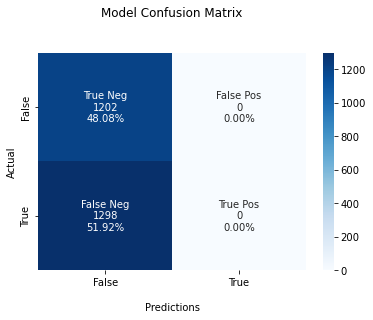

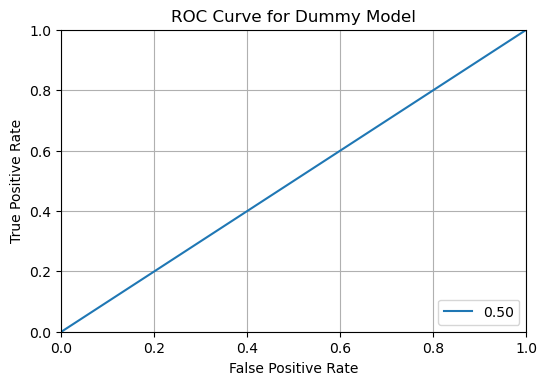

In [28]:
confusion_matrix_show(confusion_matrix(y_test2, y_predict))

plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test2, y_predict)
plt.plot(fpr,tpr,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test2,y_predict))
plt.legend(loc = 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Dummy Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

From the dummy model, we can see that about a 0.5 accuracy, precision and recall would be considered a poor score. We should aim to get higher than that

In [29]:
#adaboost
#random
#xgboost
#gradiant 

# Adaboost Model

Adaboost is a tree-based supervised learning algorithm

It uses CART (decision tree) as base estimator but can use other estimators

Fits a sequence of "weak learners" (such as a one-level decision tree) on repeatedly modified versions of data

With each iteration, the 'weight' of each sample is modified, and the algorithm reapplied based on these weights. The training samples that are more difficult to classify correctly are higher weighted with each iteration, forcing the trees to learn them better. At the end, we receive a 'flatter' distribution of predictions.



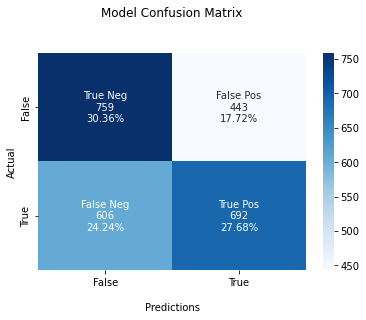

Precision: 0.5894666666666667
Recall: 0.5894666666666667
Accuracy:0.5804


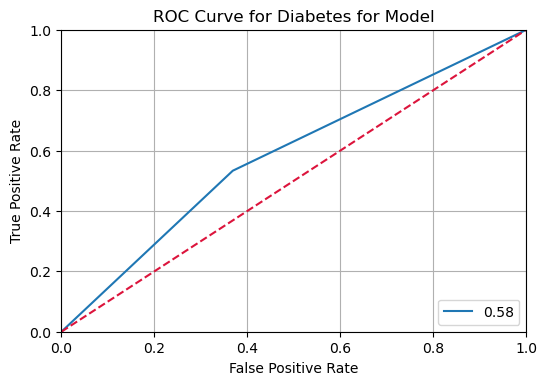

In [30]:
adaboost = AdaBoostClassifier()

adaboost.fit(X_train2,y_train2)

y_predict = adaboost.predict(X_test2)

y_train_pred = cross_val_predict(adaboost, X_train2, y_train2, cv=3)

precision = precision_score(y_train2, y_train_pred, average='micro')

recall = recall_score(y_train2, y_train_pred, average='micro')

accuracy = adaboost.score(X_test2, y_test2)


confusion_matrix_show(confusion_matrix(y_test2, y_predict))

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy:{accuracy}")

roc_show(y_test2,y_predict)

This is only slightly better than our dummy model. We can try to improve it via feature selection:

In [31]:
def select_features(X_train, y_train, X_test,i):
    
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=i)
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    
    # transform test input data
    X_test_fs = fs.transform(X_test)
        
    return X_train_fs, X_test_fs, fs

In [32]:
X_train_fs, X_test_fs, fs = select_features(X_train2, y_train2, X_test2,2425)

In [33]:
%%time
adaboost = AdaBoostClassifier()
adaboost = adaboost.fit(X_train_fs,y_train2)

adaboost.score(X_test_fs,y_test2)

Wall time: 9min 14s


0.5752

In [34]:
%%time
# Number of trees in adaboost
n_estimators = [10, 50, 100, 500]

# Learning rate in adaboost
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0]

# algorithm in adaboost
algorithm = ['SAMME', 'SAMME.R']

# base estimator

base_estimator = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators=20)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'algorithm': algorithm,
               'base_estimator': base_estimator}

Wall time: 0 ns


In [ ]:
%%time
adaboosted = RandomizedSearchCV(estimator = adaboost, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=3, random_state=42, n_jobs = -1, scoring='accuracy')

# Fit the random search model
adaboosted.fit(X_train_fs, y_train2)

In [ ]:
%%time
adaboosted.best_params_

In [ ]:
%%time
adaboost = AdaBoostClassifier(n_estimators= ,learning_rate= ,
                                  algorithm= ,base_estimator= )

adaboost.fit(X_train_fs,y_train2)

y_train_pred = cross_val_predict(adaboost, X_train_fs, y_train2, cv=3)

precision = precision_score(y_train2, y_train_pred, average='micro')

recall = recall_score(y_train2, y_train_pred, average='micro')

accuracy = adaboost.score(X_test_fs, y_test2)

confusion_matrix_show(confusion_matrix(y_test2, y_predict))

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy:{accuracy}")

roc_show(y_test2,y_predict)

# Random Forest Classifier

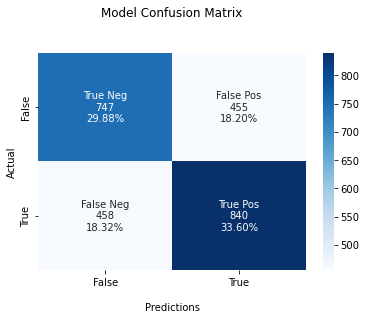

Precision: 0.6386666666666667
Recall: 0.6386666666666667
Accuracy:0.6348
Wall time: 35min 41s


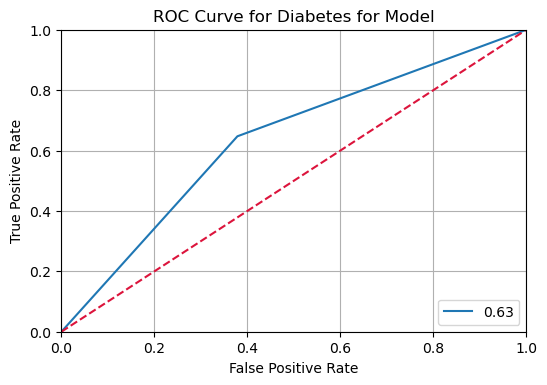

In [35]:
%%time

rf = RandomForestClassifier()

rf.fit(X_train2,y_train2)

y_predict = rf.predict(X_test2)

y_train_pred = cross_val_predict(rf, X_train2, y_train2, cv=3)

precision = precision_score(y_train2, y_train_pred, average='micro')

recall = recall_score(y_train2, y_train_pred, average='micro')

accuracy = rf.score(X_test2, y_test2)


confusion_matrix_show(confusion_matrix(y_test2, y_predict))

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy:{accuracy}")

roc_show(y_test2,y_predict)

In [36]:
X_train_fs, X_test_fs, fs = select_features(X_train2, y_train2, X_test2,2425)

2450: about the same, 0.636

2475: 0.6352

2425: 0.644

2415: 0.6284

2420: 0.624

In [37]:
%%time
rf = RandomForestClassifier()
rf = rf.fit(X_train_fs,y_train2)

rf.score(X_test_fs,y_test2)

Wall time: 3min 54s


0.6404

In [38]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [48]:
%%time
# search across 100 different combinations
rf = RandomForestClassifier()

rf.fit(X_train_fs,y_train2)

Wall time: 1min 17s


RandomForestClassifier()

In [49]:
%%time
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=3, random_state=42, n_jobs = -1, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_train_fs, y_train2)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Wall time: 1h 21min


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='accuracy', verbose=3)

In [ ]:
rf_random.best_params_

In [ ]:
%%time
rf = RandomForestClassifier(n_estimators=, max_features=, 
                           max_depth=, min_samples_split=, 
                           min_samples_leaf= , bootstrap= )

rf.fit(X_train_fs,y_train2)

y_train_pred = cross_val_predict(rf, X_train_fs, y_train2, cv=3)

precision = precision_score(y_train2, y_train_pred, average='micro')

recall = recall_score(y_train2, y_train_pred, average='micro')

accuracy = rf.score(X_test_fs, y_test2)

confusion_matrix_show(confusion_matrix(y_test2, y_predict))

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy:{accuracy}")

roc_show(y_test2,y_predict)

# XGboost

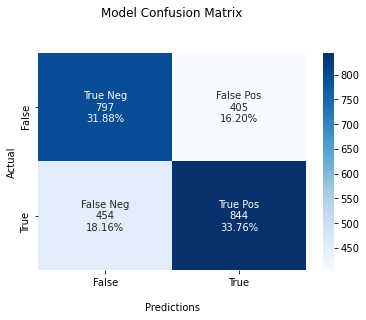

Precision: 0.6518222222222222
Recall: 0.6518222222222222
Accuracy:0.6564


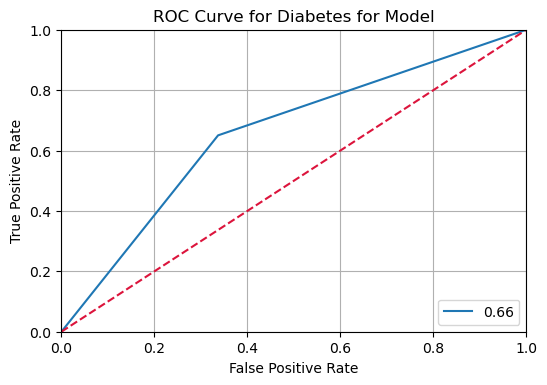

In [93]:
xg = XGBClassifier()

xg.fit(X_train2,y_train2)

y_predict = xg.predict(X_test2)

y_train_pred = cross_val_predict(xg, X_train2, y_train2, cv=3)

precision = precision_score(y_train2, y_train_pred, average='micro')

recall = recall_score(y_train2, y_train_pred, average='micro')

accuracy = xg.score(X_test2, y_test2)


confusion_matrix_show(confusion_matrix(y_test2, y_predict))

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy:{accuracy}")

roc_show(y_test2,y_predict)

In [100]:
X_train_fs, X_test_fs, fs = select_features(X_train2, y_train2, X_test2,2450)

In [101]:
xg = XGBClassifier()
xg = xg.fit(X_train_fs,y_train2)

xg.score(X_test_fs,y_test2)

0.6512

In [95]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xg = XGBClassifier()

xg.fit(X_train_fs,y_train2)

xg_random = RandomizedSearchCV(estimator = xg, param_distributions = params, n_iter = 100, cv = 3, verbose=3, random_state=42, n_jobs = -1, scoring='accuracy')
# Fit the random search model
xg_random.fit(X_train_fs, y_train2)

In [ ]:
xg_random.best_params_

In [ ]:
xg = XGBClassifier(min_child_weight=, gamma=, subsample=,
                           colsample_bytree=,max_depth=)

xg.fit(X_train_fs,y_train2)

y_train_pred = cross_val_predict(xg, X_train_fs, y_train2, cv=3)

precision = precision_score(y_train2, y_train_pred, average='micro')

recall = recall_score(y_train2, y_train_pred, average='micro')

accuracy = xg.score(X_test_fs, y_test2)

confusion_matrix_show(confusion_matrix(y_test2, y_predict))

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy:{accuracy}")

roc_show(y_test2,y_predict)

# Gradient 

In [ ]:
gradient = GradientBoostingClassifier()

gradient.fit(X_train2,y_train2)

y_predict = gradient.predict(X_test2)

y_train_pred = cross_val_predict(gradient, X_train2, y_train2, cv=3)

precision = precision_score(y_train2, y_train_pred, average='micro')

recall = recall_score(y_train2, y_train_pred, average='micro')

accuracy = gradient.score(X_test2, y_test2)


confusion_matrix_show(confusion_matrix(y_test2, y_predict))

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy:{accuracy}")

roc_show(y_test2,y_predict)

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train2, y_train2, X_test2,2450)

In [ ]:
gradient = GradientBoostingClassifier()
gradient = gradient.fit(X_train_fs,y_train2)

gradient.score(X_test_fs,y_test2)

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8] 

In [ ]:
gradient = GradientBoostingClassifier()

gradient.fit(X_train_fs,y_train2)

gradient_rand = RandomizedSearchCV(estimator = gradient, param_distributions = parameters, n_iter = 100, cv = 3, verbose=3, random_state=42, n_jobs = -1, scoring='accuracy')
# Fit the random search model
gradient_rand.fit(X_train_fs, y_train2)

In [ ]:
gradient_rand.best_params_

In [ ]:
gradient = GradientBoostingClassifier(learning_rate=, subsample=, n_estimators=,max_depth=)

gradient.fit(X_train_fs,y_train2)

y_train_pred = cross_val_predict(gradient, X_train_fs, y_train2, cv=3)

precision = precision_score(y_train2, y_train_pred, average='micro')

recall = recall_score(y_train2, y_train_pred, average='micro')

accuracy = gradient.score(X_test_fs, y_test2)

confusion_matrix_show(confusion_matrix(y_test2, y_predict))

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy:{accuracy}")

roc_show(y_test2,y_predict)